In [1]:
%pip install pandas matplotlib scikit-learn seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 8.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 8.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 9.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 8.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 9.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 9.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 9.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15/15 [seaborn]4/15 [seaborn]ib]n]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [6]:
acutal_filename = os.path.join(os.getcwd(), 'ds04/assets/truth.txt')
predicted_filename = os.path.join(os.getcwd(), 'ds04/assets/predictions.txt')
actual_df = pd.read_csv(acutal_filename, header=None, names=['knight'])
predicted_df = pd.read_csv(predicted_filename, header=None, names=['knight'])

print('Actual:', actual_df.shape)
print('Predicted', predicted_df.shape)
actual_df.head()

Actual: (100, 1)
Predicted (100, 1)


,knight
0,Jedi
1,Jedi
2,Sith
3,Sith
4,Jedi


In [8]:
cm = confusion_matrix(actual_df['knight'], predicted_df['knight'], labels=['Jedi', 'Sith'])
# (tn, fp, fn, tp)
cm

array([[25, 24],
       [30, 21]])

In [11]:
cls_report = classification_report(actual_df['knight'], predicted_df['knight'])
print(cls_report)

              precision    recall  f1-score   support

        Jedi       0.45      0.51      0.48        49
        Sith       0.47      0.41      0.44        51

    accuracy                           0.46       100
   macro avg       0.46      0.46      0.46       100
weighted avg       0.46      0.46      0.46       100



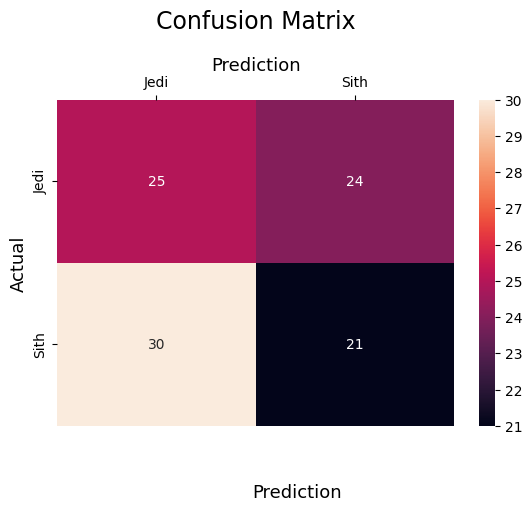

In [9]:
sns.heatmap(
    cm, 
    annot=True,
    fmt='g', 
    xticklabels=['Jedi','Sith'],
    yticklabels=['Jedi','Sith']
)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()